# Setup

## Imports

In [342]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn.metrics
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report, \
    precision_recall_curve, make_scorer, accuracy_score, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold


## Constants

In [343]:
numeric_columns = ['Age', 'Tscore', 'Height', 'Weight', 'BMI', 'BASP', 'PTHpmoll', 'Vitdnmoll', 'CTXmygl', 'P1NP', 'calciumion', 'creatinin', 'eGFR', 'oks_total', 'VAS_aktiv']

boolean_columns = ['Sex', 'Cem_ucem', 'TKA', 'side', 'exercise', 'former_alcoholabuse', 'smoker', 'former_smoker']

# Setup Data

## Load Data

In [344]:
# Train data
train_data_path = "data/Train_data.xls"
X_train = pd.read_excel(train_data_path)
X_train.pop('Number')

# Test data
test_data_path = "data/Test_data.xls"
X_test = pd.read_excel(test_data_path)
X_test.pop('Number')

# Validation data
validation_data_path = "data/Validation_data.xls"
X_validation = pd.read_excel(validation_data_path)
number = X_validation.pop('Number')

## Preprocessing

### Fix absent data
- take mean value for mean values
- take most popular for booleans

In [345]:
# Fixes data
# When a value is missing
# - if column is numeric -> take mean
# - if column is boolean -> take most popular
def fixAbsentData(df: pd.DataFrame):

    # Get Values for numeric columns
    for column in numeric_columns:
        if column in df:
            mean = df[column].mean()
            df[column] = df[column].fillna(mean)

    # Get Values for boolean columns
    for column in boolean_columns:
        if column in df:
            mean = df[column].mean()

            if(mean <= 0.5):
                mean = 0
            else:
                mean = 1
            df[column] = df[column].fillna(mean)
    return df

train_X = fixAbsentData(X_train)
test_X = fixAbsentData(X_test)
validation_X = fixAbsentData(X_validation)

y_train = X_train.pop('MIG_group')
y_validation = X_validation.pop('MIG_group')

MinMaxScaler().fit_transform(X_train)

array([[1.        , 0.56603774, 0.2739726 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.90566038, 0.34246575, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.43396226, 0.54794521, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.35849057, 0.49315068, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.35849057, 0.30136986, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.56603774, 0.57534247, ..., 0.        , 0.        ,
        1.        ]])

### Playground

Best Parameters                               :  {'clf': SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},
    gamma='auto', kernel='poly', max_iter=1000000), 'clf__C': 10000, 'clf__class_weight': {0: 0.6633333333333333, 1: 0.33666666666666667}, 'clf__degree': 3, 'clf__gamma': 'auto', 'clf__kernel': 'poly', 'scaler': MinMaxScaler()}
Best Score                                    :  0.23101898101898102
True Positive Rates                           :  [0.         0.         0.         0.13333333 0.13333333 0.2
 0.2        0.26666667 0.26666667 0.33333333 0.33333333 0.4
 0.4        0.46666667 0.46666667 0.53333333 0.53333333 0.66666667
 0.66666667 0.86666667 0.86666667 0.93333333 0.93333333 1.        ]
False Positive Rates                          :  [0.         0.02857143 0.05714286 0.05714286 0.17142857 0.17142857
 0.34285714 0.34285714 0.37142857 0.37142857 0.4        0.4
 0.48571429 0.48571429 0.54285714 0.54285714 0.62857143 0.62857143
 0.77142857 0.77142857 0

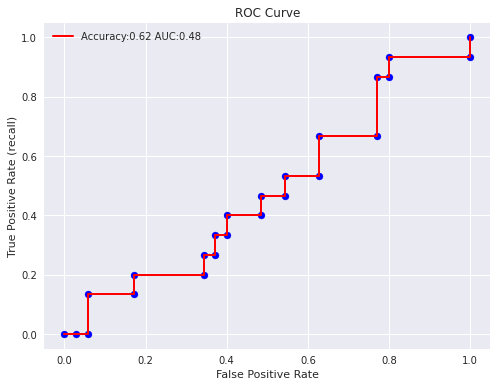

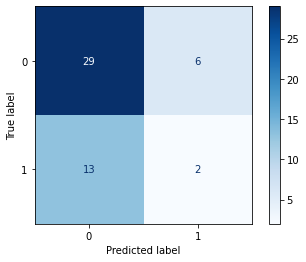

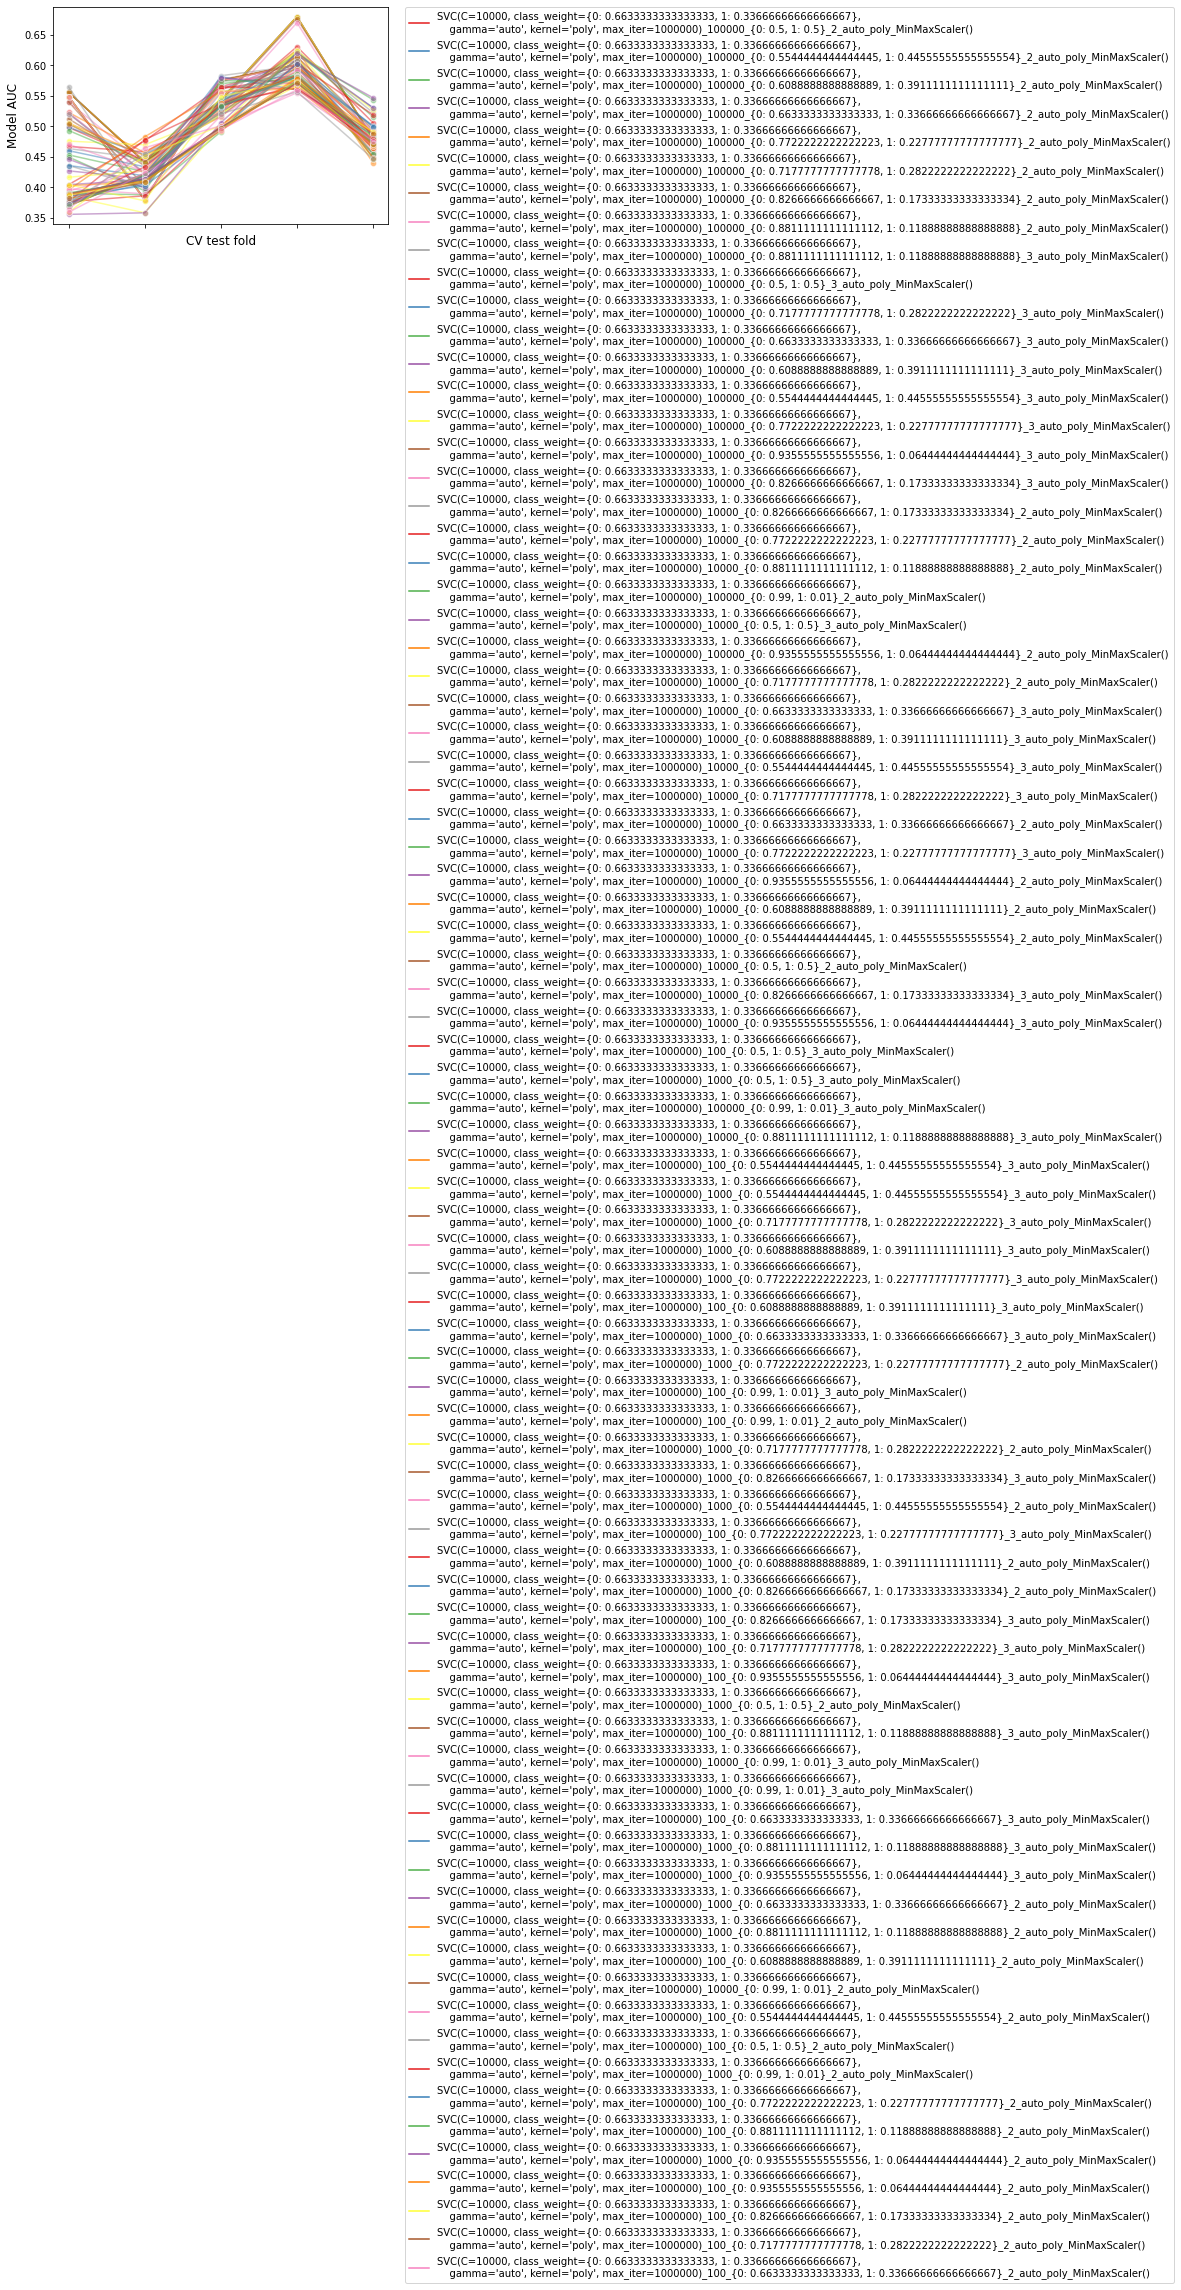

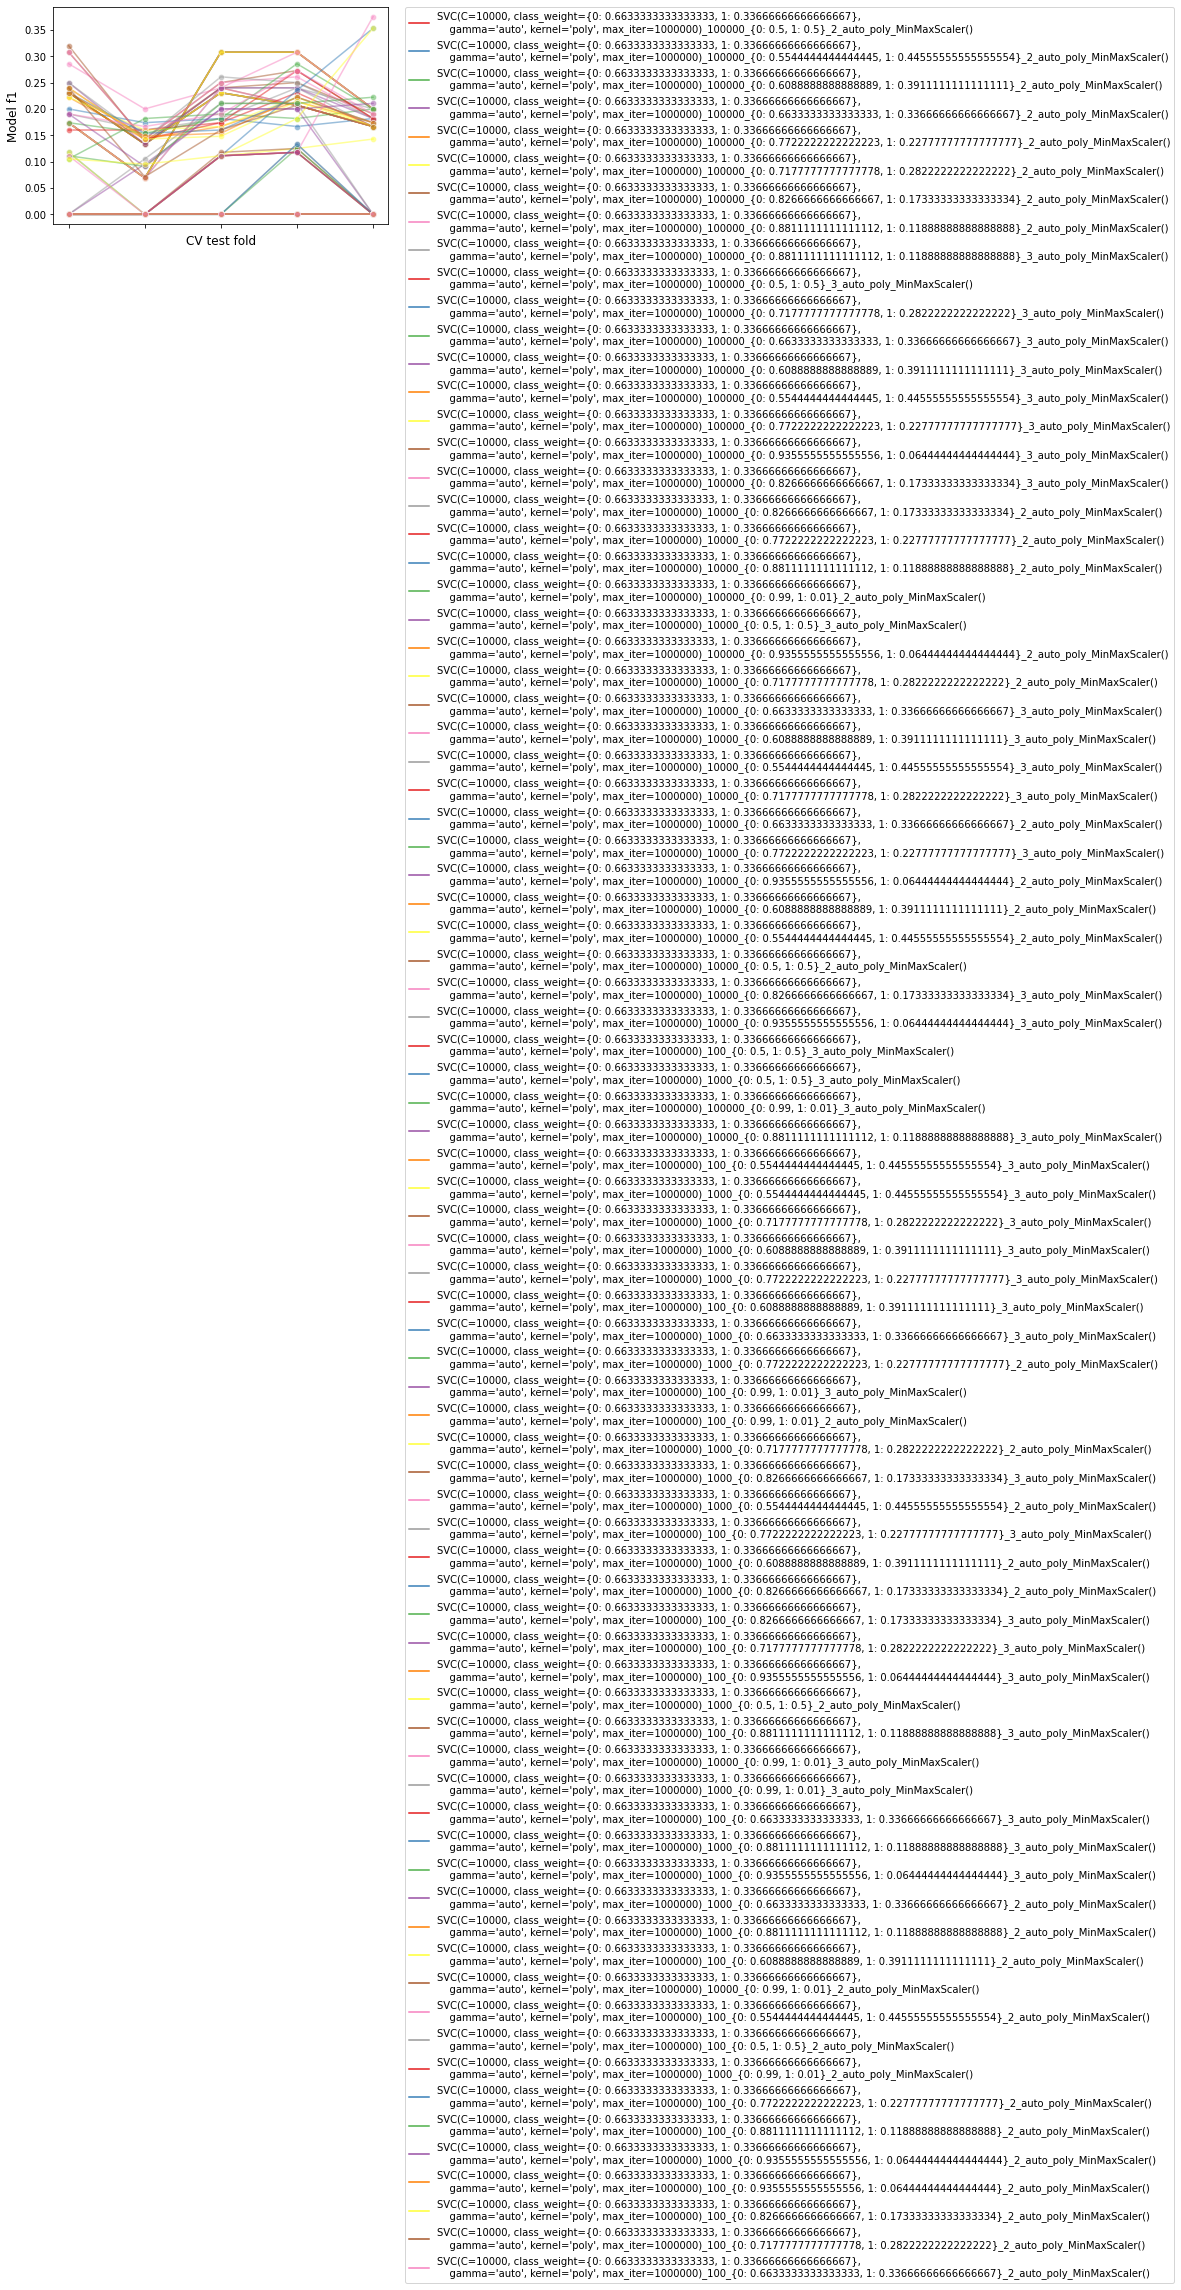

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_clf__class_weight,param_clf__degree,param_clf__gamma,param_clf__kernel,...,std_test_f1,rank_test_f1,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
kernel,,,,,,,,,,,,,,,,,,,,,
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100000_{0: 0.5, 1: 0.5}_2_auto_poly_MinMaxScaler()",0.057948,0.008033,0.011012,0.002612,"SVC(C=10000, class_weight={0: 0.66333333333333...",100000,"{0: 0.5, 1: 0.5}",2,auto,poly,...,0.038203,18,0.666667,0.566667,0.666667,0.616667,0.666667,0.636667,0.040000,74
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100000_{0: 0.5544444444444445, 1: 0.44555555555555554}_2_auto_poly_MinMaxScaler()",0.050250,0.006521,0.009257,0.000451,"SVC(C=10000, class_weight={0: 0.66333333333333...",100000,"{0: 0.5544444444444445, 1: 0.44555555555555554}",2,auto,poly,...,0.038203,18,0.666667,0.566667,0.666667,0.616667,0.666667,0.636667,0.040000,74
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100000_{0: 0.6088888888888889, 1: 0.3911111111111111}_2_auto_poly_MinMaxScaler()",0.051688,0.004198,0.009124,0.001065,"SVC(C=10000, class_weight={0: 0.66333333333333...",100000,"{0: 0.6088888888888889, 1: 0.3911111111111111}",2,auto,poly,...,0.038203,18,0.666667,0.566667,0.666667,0.616667,0.666667,0.636667,0.040000,74
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100000_{0: 0.6633333333333333, 1: 0.33666666666666667}_2_auto_poly_MinMaxScaler()",0.058570,0.009012,0.012441,0.003284,"SVC(C=10000, class_weight={0: 0.66333333333333...",100000,"{0: 0.6633333333333333, 1: 0.33666666666666667}",2,auto,poly,...,0.038203,18,0.666667,0.566667,0.666667,0.616667,0.666667,0.636667,0.040000,74
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100000_{0: 0.7722222222222223, 1: 0.22777777777777777}_2_auto_poly_MinMaxScaler()",0.050411,0.004808,0.009520,0.001017,"SVC(C=10000, class_weight={0: 0.66333333333333...",100000,"{0: 0.7722222222222223, 1: 0.22777777777777777}",2,auto,poly,...,0.038203,18,0.666667,0.566667,0.666667,0.616667,0.666667,0.636667,0.040000,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_1000_{0: 0.9355555555555556, 1: 0.06444444444444444}_2_auto_poly_MinMaxScaler()",0.021100,0.002325,0.014777,0.003335,"SVC(C=10000, class_weight={0: 0.66333333333333...",1000,"{0: 0.9355555555555556, 1: 0.06444444444444444}",2,auto,poly,...,0.000000,52,0.800000,0.766667,0.783333,0.783333,0.783333,0.783333,0.010541,23
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100_{0: 0.9355555555555556, 1: 0.06444444444444444}_2_auto_poly_MinMaxScaler()",0.022794,0.011388,0.037427,0.026898,"SVC(C=10000, class_weight={0: 0.66333333333333...",100,"{0: 0.9355555555555556, 1: 0.06444444444444444}",2,auto,poly,...,0.000000,52,0.800000,0.783333,0.783333,0.783333,0.783333,0.786667,0.006667,1
"SVC(C=10000, class_weight={0: 0.6633333333333333, 1: 0.33666666666666667},\n gamma='auto', kernel='poly', max_iter=1000000)_100_{0: 0.8266666666666667, 1: 0.17333333333333334}_2_auto_poly_MinMaxScaler()",0.023326,0.010401,0.020515,0.008910,"SVC(C=10000, class_weight={0: 0.66333333333333...",100,"{0: 0.8266666666666667, 1: 0.17333333333333334}",2,auto,poly,...,0.000000,52,0.800000,0.783333,0.783333,0.783333,0.783333,0.786667,0.006667,1


In [361]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import chi2

max_iter=1000000
#clf =
clf = QuadraticDiscriminantAnalysis()

pipe = Pipeline([
    ("scaler", "passthrough"),
    #("reduce_dim", "passthrough"),
    ("clf", "passthrough")
]
)

weights = np.linspace(0.01,0.5,10)

kernels = ['poly']
C = [100, 1000, 10000, 100000]
gamma = ['auto']
class_weight = [{0:1-x, 1:x} for x in weights]

parameter_grid = [
    {
        "scaler": [MinMaxScaler()],
        #"reduce_dim": [ SelectKBest(k=x) for x in range(10, 23, 1)],
        "clf": [SVC(max_iter=max_iter)],
        'clf__kernel': kernels,
        'clf__C': C,
        'clf__gamma': gamma,
        'clf__class_weight': class_weight,
        'clf__degree': [2, 3]
    },
    # {
    #     "scaler": [RobustScaler()],
    #     #"reduce_dim": [ PCA(n_components=x) for x in range(10, 23, 1)],
    #     "clf": [QuadraticDiscriminantAnalysis()],
    # },
    # {
    #     "scaler": [RobustScaler()],
    #      #"reduce_dim": [ SelectKBest(k=x) for x in range(10, 23, 1)],
    #     "clf": [LinearDiscriminantAnalysis()],
    # },
    # {
    #     "scaler": [StandardScaler()],
    #     "clf": [RandomForestClassifier()],
    # },
]

scoring = {"AUC": "roc_auc", "f1": "f1", "Accuracy": make_scorer(accuracy_score)}
grid = GridSearchCV(pipe,
                      parameter_grid,
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=5,),
                      scoring=scoring,
                      refit='f1')

grid.fit(X_train, y_train)

# Print best model
print('Best Parameters                               : ',grid.best_params_)
print('Best Score                                    : ',grid.best_score_)

# Print performance on validation set
decision_function = grid.best_estimator_.decision_function(X_validation)
fpr, tpr, thresholds = roc_curve(y_validation, decision_function)

print('True Positive Rates                           : ', tpr)
print('False Positive Rates                          : ', fpr)
print('Different Thresholds For Calculating TPR, FPR : ', thresholds)
print('Classification Report                         : ')
print(classification_report(y_validation, grid.best_estimator_.predict(X_validation)))

# PLOT AUC score
acc = grid.best_estimator_.score(X_validation, y_validation)
auc = roc_auc_score(y_validation, decision_function)

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:%.2f AUC:%.2f" % (acc, auc), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best');

# Plot confusion matrix
y_validation_pred = grid.predict(X_validation)
cm = confusion_matrix(y_validation, y_validation_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compare models
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_AUC"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")

# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_AUC")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

model_scores = results_df.filter(regex=r"split\d*_test_f1")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model f1", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Store test prediction in csv file
predicted_test = pd.DataFrame(grid.predict(X_test))
predicted_test.index += 1
predicted_test.to_csv(f"{os.getcwd()}/test2.csv")
results_df